In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [75]:
from pyproj import Proj, transform

def longToWeb(lat, long):
    return transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), long, lat)

# xmin, ymin = longToWeb(df.latitude.min(), df.longitude.max())
xmin, ymin = longToWeb(41.65, 87.5)

ModuleNotFoundError: No module named 'pyproj'

In [72]:
from bokeh.plotting import figure, show, output_file
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models.widgets import Panel, Tabs
from bokeh.layouts import widgetbox
from bokeh.models.widgets import RangeSlider

output_file("tile.html")

# range bounds supplied in web mercator coordinates
p1 = figure(x_range=(-9793758.387,xmin), y_range=(5289550.054,ymin),
           x_axis_type="mercator", y_axis_type="mercator")
p1.add_tile(CARTODBPOSITRON)
range_slider = RangeSlider(start=0, end=10, value=(1,9), step=.1, title="Stuff")

show(widgetbox(range_slider))
tab1 = Panel(child=p1, title="num_mos")

# show(p1)
p2 = figure(x_range=(-9793758.387,-9740000), y_range=(5289550.054,4990000),
           x_axis_type="mercator", y_axis_type="mercator")
p2.add_tile(CARTODBPOSITRON)
range_slider = RangeSlider(start=0, end=10, value=(1,9), step=.1, title="Stuff")

show(widgetbox(range_slider))
tab2 = Panel(child=p2, title="wnv")

tabs = Tabs(tabs=[ tab1, tab2 ])

show(tabs)

In [2]:
ps_spray = pd.read_csv('../assets/spray.csv')
ps_train = pd.read_csv('../assets/train.csv')

In [ ]:
print(ps_train.shape)
print(ps_train.isnull().sum().sum())
ps_train.head().T

In [ ]:
len(ps_train['Trap'].unique())

In [ ]:
len(ps_train[ps_train['Trap']=='T009'])

In [ ]:
ps_train[ps_train['Trap']=='T009']['Address'].value_counts()

In [ ]:
ps_train[ps_train['Trap']=='T035']['Address'].value_counts()

In [ ]:
len(ps_train['Address'].unique())

In [ ]:
print(ps_train[['Trap','Address']]['Address'].value_counts())

In [ ]:
ps_train['Species'].value_counts()

In [ ]:
ps_train['Block'].value_counts()

In [ ]:
len(ps_train['Block'].unique())

In [ ]:
ps_train.info()

In [3]:
ps_train['Date'] = ps_train['Date'].astype('datetime64')

In [4]:
ps_train = ps_train.set_index('Date')

In [202]:
len(ps_train['2007'])

3811

In [ ]:
ps_train.index.month

In [ ]:
ps_train[(ps_train['Species']=='CULEX PIPIENS')&(ps_train.index.month==7)]['WnvPresent'].sum()

In [5]:
ps_address = ps_train[['Address','Species','Latitude','Longitude','NumMosquitos','WnvPresent']]

In [6]:
ps_address.to_csv('../assets/ps_address.csv')

In [ ]:
ps_address.head()

In [ ]:
week_wnv = ps_address['WnvPresent'].resample('W', how='sum')
week_wnv = week_wnv[week_wnv>0]
print(week_wnv)

In [ ]:
ps_address = ps_address[ps_address['Species'].isin(['CULEX RESTUANS', 
                                     'CULEX PIPIENS',
                                     'CULEX PIPIENS/RESTUANS'])]

In [ ]:
ps_address.shape

In [ ]:
num_mos = ps_address.groupby(['Address',
                              'Latitude',
                              'Longitude',
                              ps_train.index])['NumMosquitos'].sum()
type(num_mos)

In [ ]:
wnv_freq = ps_address.groupby(['Address',
                               'Latitude',
                               'Longitude',
                               ps_train.index])['WnvPresent'].sum()
wnv_freq

In [ ]:
ps_train.index.month==9

In [ ]:
ps_train.groupby(ps_train.index.month).WnvPresent.sum()

In [ ]:
datetime.datetime.strptime(, "%Y-W%W")

In [7]:
ps_add1 = ps_train.assign(Week=lambda df: df.index.week).groupby([ps_train.index,'Week','Species',
                    'Address','Latitude','Longitude']).WnvPresent.sum().reset_index()
ps_add1[ps_add1['Date']=='2013-07-12']
# ps_add1['Date'].unique()

,Date,Week,Species,Address,Latitude,Longitude,WnvPresent
6941,2013-07-12,28,CULEX PIPIENS/RESTUANS,"1000 East 67th Street, Chicago, IL 60637, USA",41.773215,-87.600880,0
6942,2013-07-12,28,CULEX PIPIENS/RESTUANS,"1000 North Central Park Avenue, Chicago, IL 60...",41.899230,-87.716788,0
6943,2013-07-12,28,CULEX PIPIENS/RESTUANS,"1100 Roosevelt Road, Chicago, IL 60608, USA",41.867108,-87.654224,0
6944,2013-07-12,28,CULEX PIPIENS/RESTUANS,"1100 South California Avenue, Chicago, IL 6061...",41.868142,-87.696269,0
6945,2013-07-12,28,CULEX PIPIENS/RESTUANS,"1200 West Greenleaf Avenue, Chicago, IL 60626,...",42.010412,-87.662140,0
6946,2013-07-12,28,CULEX PIPIENS/RESTUANS,"1300 North Laramie Avenue, Chicago, IL 60651, USA",41.904194,-87.756155,0
6947,2013-07-12,28,CULEX PIPIENS/RESTUANS,"1400 North Sacramento Avenue, Chicago, IL 6062...",41.906638,-87.701431,0
6948,2013-07-12,28,CULEX PIPIENS/RESTUANS,"1700 North Ashland Avenue, Chicago, IL 60622, USA",41.912563,-87.668055,0
6949,2013-07-12,28,CULEX PIPIENS/RESTUANS,"1700 North Pulaski Road, Chicago, IL 60639, USA",41.911824,-87.726737,0
6950,2013-07-12,28,CULEX PIPIENS/RESTUANS,"1700 West 95th Street, Chicago, IL 60643, USA",41.720848,-87.666014,0


In [131]:
ps_add2 = ps_train.assign(Week=lambda df: df.index.week).groupby([ps_train.index,'Week','Species',
                    'Address','Latitude','Longitude']).NumMosquitos.sum().reset_index()
ps_add2[ps_add2['Date']=='2013-06-07']

,Date,Week,Species,Address,Latitude,Longitude,NumMosquitos
6463,2013-06-07,23,CULEX PIPIENS/RESTUANS,"1000 East 67th Street, Chicago, IL 60637, USA",41.773215,-87.600880,2
6464,2013-06-07,23,CULEX PIPIENS/RESTUANS,"1200 West Greenleaf Avenue, Chicago, IL 60626,...",42.010412,-87.662140,1
6465,2013-06-07,23,CULEX PIPIENS/RESTUANS,"1300 North Laramie Avenue, Chicago, IL 60651, USA",41.904194,-87.756155,2
6466,2013-06-07,23,CULEX PIPIENS/RESTUANS,"1700 West Addison Street, Chicago, IL 60613, USA",41.947227,-87.671457,3
6467,2013-06-07,23,CULEX PIPIENS/RESTUANS,"2200 West 69th Street, Chicago, IL 60636, USA",41.768388,-87.678649,2
6468,2013-06-07,23,CULEX PIPIENS/RESTUANS,"3500 West 51st Street, Chicago, IL 60632, USA",41.800737,-87.711880,2
6469,2013-06-07,23,CULEX PIPIENS/RESTUANS,"3900 North Springfield Avenue, Chicago, IL 606...",41.951866,-87.725057,1
6470,2013-06-07,23,CULEX PIPIENS/RESTUANS,"3900 South Ashland Avenue, Chicago, IL 60609, USA",41.822536,-87.666343,1
6471,2013-06-07,23,CULEX PIPIENS/RESTUANS,"4200 West 127th Street, Alsip, IL 60803, USA",41.662014,-87.724608,1
6472,2013-06-07,23,CULEX PIPIENS/RESTUANS,"4200 West 65th Street, Chicago, IL 60621, USA",41.776428,-87.627096,1


In [9]:
ps_add1.to_csv('../assets/ps_add_wnv_present.csv')
ps_add2.to_csv('../assets/ps_add_num_mosquitos.csv')

In [10]:
import plotly
import plotly.graph_objs as go
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")

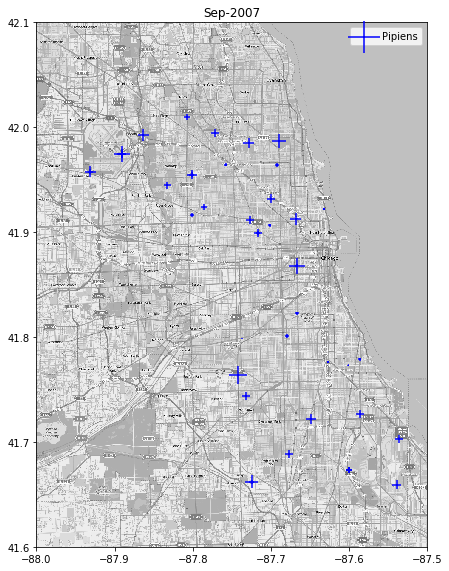

In [41]:
fig=plt.figure(figsize=(7,12))
plt.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = (-88, -87.5, 41.6, 42.1),
           aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1])
# rest = (ps_train['Species']=='CULEX RESTUANS') & (ps_train.index.month==9) &(ps_train['WnvPresent']==1)
pip  = (ps_train['Species']=='CULEX PIPIENS') & (ps_train.index.month==9) & (ps_train['WnvPresent']==1)
# mix  = ps_train['Species']=='CULEX PIPIENS/RESTUANS'
# teri  = ps_train['Species']=='CULEX TERRITANS'
# sal  = ps_train['Species']=='CULEX SALINARIUS'
# tar  = ps_train['Species']=='CULEX TARSALIS'
# err  = ps_train['Species']=='CULEX ERRATICUS'
# plt.scatter(ps_train[rest]['Longitude'],
#             ps_train[rest]['Latitude'],marker='o',facecolors='none',
#             edgecolors='r', label='Restuans',s=)
plt.scatter(ps_train[pip]['Longitude'],
            ps_train[pip]['Latitude'],marker='+',color='b',label='Pipiens',
            s=ps_address.groupby('Address')['NumMosquitos'].sum()/10)
# plt.scatter(ps_train[mix]['Longitude'],
#             ps_train[mix]['Latitude'],marker='o',color='y',label='Pipiens/Restuans')
# plt.scatter(ps_train[teri]['Longitude'],
#             ps_train[teri]['Latitude'],marker='o',color='g',label='Territans')
# plt.scatter(ps_train[sal]['Longitude'],
#             ps_train[sal]['Latitude'],marker='o',color='g',label='Salinarius')
# plt.scatter(ps_train[tar]['Longitude'],
#             ps_train[tar]['Latitude'],marker='o',color='g',label='Tarsalis')
# plt.scatter(ps_train[err]['Longitude'],
#             ps_train[err]['Latitude'],marker='o',color='g',label='Erraticus')
plt.title('Sep-2007')
plt.legend()

In [86]:
ps_add1[(ps_add1['Date']=='2007-07-25') & (ps_add1['WnvPresent']>0)]['Latitude']

565    41.673408
569    41.673408
Name: Latitude, dtype: float64

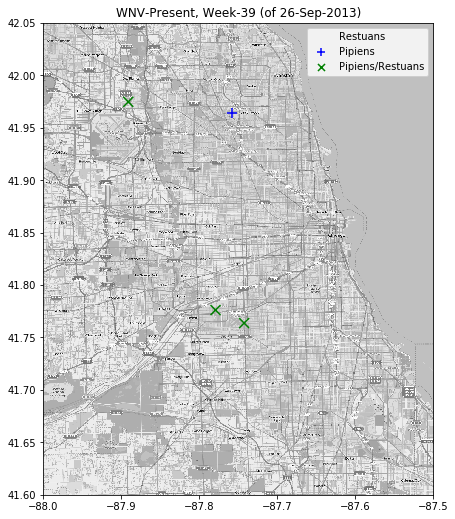

In [11]:
fig=plt.figure(figsize=(7,12))
plt.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = (-88, -87.5, 41.6, 42.05),
           aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1])
d_w = '2013-09-26'
rest = (ps_add1['Species']=='CULEX RESTUANS') & (ps_add1['Date']==d_w)
pip  = (ps_add1['Species']=='CULEX PIPIENS') & (ps_add1['Date']==d_w)
mix  = (ps_add1['Species']=='CULEX PIPIENS/RESTUANS') & (ps_add1['Date']==d_w)

plt.scatter(ps_add1[rest]['Longitude'],
            ps_add1[rest]['Latitude'],marker='o',facecolors='none',
            edgecolors='r', label='Restuans',s=ps_add1[rest]['WnvPresent']*100)
plt.scatter(ps_add1[pip]['Longitude'],
            ps_add1[pip]['Latitude'],marker='+',color='b',label='Pipiens',
            s=ps_add1[pip]['WnvPresent']*100)
plt.scatter(ps_add1[mix]['Longitude'],
            ps_add1[mix]['Latitude'],marker='x',color='g',label='Pipiens/Restuans',
            s=ps_add1[mix]['WnvPresent']*100)

plt.title('WNV-Present, Week-39 (of 26-Sep-2013)')
plt.legend()

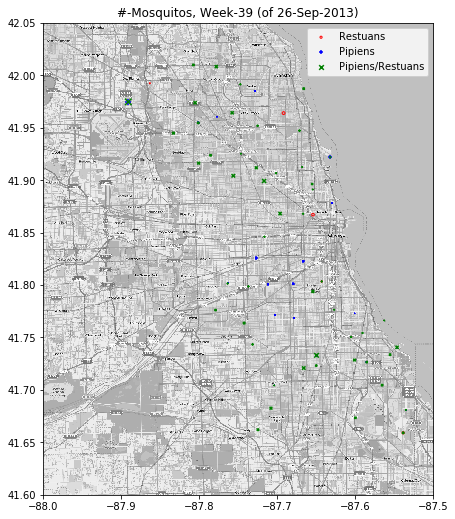

In [149]:
fig=plt.figure(figsize=(7,12))
plt.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = (-88, -87.5, 41.6, 42.05),
           aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1])
d_w = '2013-09-26'
rest = (ps_add2['Species']=='CULEX RESTUANS') & (ps_add2['Date']==d_w) & (ps_add2['NumMosquitos']>0)
pip  = (ps_add2['Species']=='CULEX PIPIENS') & (ps_add2['Date']==d_w) & (ps_add2['NumMosquitos']>0)
mix  = (ps_add2['Species']=='CULEX PIPIENS/RESTUANS') & (ps_add2['Date']==d_w) & (ps_add2['NumMosquitos']>0)

plt.scatter(ps_add2[rest]['Longitude'],
            ps_add2[rest]['Latitude'],marker='o',facecolors='none',
            edgecolors='r', label='Restuans',s=ps_add2[rest]['NumMosquitos'])
plt.scatter(ps_add2[pip]['Longitude'],
            ps_add2[pip]['Latitude'],marker='+',color='b',label='Pipiens',
            s=ps_add2[pip]['NumMosquitos'])
plt.scatter(ps_add2[mix]['Longitude'],
            ps_add2[mix]['Latitude'],marker='x',color='g',label='Pipiens/Restuans',
            s=ps_add2[mix]['NumMosquitos'])

plt.title('#-Mosquitos, Week-39 (of 26-Sep-2013)')
plt.legend()

In [ ]:
print(mix.sum())
print(rest.sum())
print(pip.sum())

In [ ]:
ps_train[rest]['Longitude'],ps_train[]

In [ ]:
ps_train['WnvPresent'].unique()